# Домашнее задание 2. Нейронные сети
## Урюпин ИУ8-84 Вариант 10


В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача классификации</th>
            <th colspan=5>Задача регрессии</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача регрессии**

A. [Набор данных](https://www.kaggle.com/aungpyaeap/fish-market) Таблица `Fish.csv`. Задача: построить модель, предсказывающую вес рыбы (колонка `Weight`). Baseline: RMSE (root mean square error) = 83.7

B. [Набор данных](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) Таблица `Car details v3.csv`. Задача: построить модель, предсказывающую стоимость автомобиля (колонка `selling_price`). Baseline: RMSE (root mean square error) = 110000

C. [Набор данных](https://www.kaggle.com/quantbruce/real-estate-price-prediction) Таблица `Real estate.csv`. Задача: построить модель, предсказывающую стоимость квадратного метра жилья (колонка `Y house price of unit area`). Baseline: RMSE (root mean square error) = 8

D. [Набор данных](https://www.kaggle.com/mirichoi0218/insurance) Таблица `insurance.csv`. Задача: построить модель, предсказывающую стоимость медицинской страховки (колонка `charges`). Baseline: RMSE (root mean square error) = 5800

E. [Набор данных](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) Объединить таблицы `winequality-white.csv` и `winequality-red.csv`. Задача: построить модель, предсказывающую качество вина (колонка `quality`). Baseline: RMSE (root mean square error) = 0.8


---

**Задача классификации**

K. [Набор данных](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) Таблица `train.csv`. Задача: детектировать токсичные комментарии (0 или 1 в колонке `toxic`) исключительно по содержимому комментария (колонка `comment_text`). Baseline: sklearn.metrics.f1_score(average='macro') по колонке `toxic` = 0.86

L. [Набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) Таблица `WA_Fn-UseC_-HR-Employee-Attrition.csv`. Задача: предсказать увольнение сотрудника (колонка `attrition`). Baseline: sklearn.metrics.f1_score(average='macro') = 0.70

M. [Набор данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset) Таблица `spam.csv` (при загрузку датасета в питоне использовать кодировку encoding='latin-1'). Задача: детектировать, является ли СМС-сообщение спамом. Baseline: sklearn.metrics.f1_score(average='macro') = 0.95

N. [Набор данных](https://www.kaggle.com/uciml/pima-indians-diabetes-database) Таблица `diabetes.csv`. Задача: детектировать, есть ли у человека диабет. Baseline: sklearn.metrics.f1_score(average='macro') = 0.73

O. [Набор данных](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) Таблица `healthcare-dataset-stroke-data.csv`. Задача: детектировать, был ли у человека инсульт. Baseline: sklearn.metrics.f1_score(average='macro') = 0.56


# 0. Инициализация библиотек

In [ ]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import torch
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch.nn import functional as F
import tensorflow as tf
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import f1_score
from google.colab import drive
from sklearn.metrics import mean_squared_error
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Искусственная неронная сеть для решения задачи регрессии (9 баллов)

## 1.1 Загрузите данные, поделить на train и test



In [ ]:
data_1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality-red.csv", sep=';')
data_1.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data_2 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/winequality-white.csv", sep=';')
data_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
data = np.concatenate((data_1, data_2), axis=0)
data = pd.DataFrame(data)
columns_per = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target = ['quality']
data.columns = columns_per + target

## 1.2 По необходимости проведите преодбработку/нормализацию данных

## 1.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=линейная регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое функцию активации можно не использовать.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_per], data[target], train_size=0.8)
loss_train = []
loss_test = []

Один слой

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([5197])) that is different to the input size (torch.Size([5197, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(1.7364, dtype=torch.float64, grad_fn=<SqrtBackward0>)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1300])) that is different to the input size (torch.Size([1300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


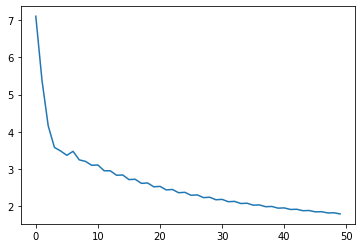

In [ ]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=11, out_features=1))
optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.2, momentum=0)
loss_f = nn.MSELoss()

loss_history_1 = []

for epoch in range(50):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1).float()))
    loss.backward()
    
    optim.step()

    loss_history_1.append(loss.item())

plt.plot(loss_history_1)

loss_train.append(loss_history_1[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
loss_test_1 = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1)))
loss_test.append(loss_test_1.detach().numpy())
print(loss_test_1)

Два слоя

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([5197])) that is different to the input size (torch.Size([5197, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.8708, dtype=torch.float64, grad_fn=<SqrtBackward0>)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1300])) that is different to the input size (torch.Size([1300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


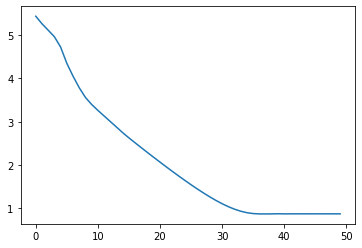

In [ ]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=11, out_features=11))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=11, out_features=1))
optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.2, momentum=0)
loss_f = nn.MSELoss()

loss_history_2 = []

for epoch in range(50):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1).float()))
    loss.backward()
    
    optim.step()

    loss_history_2.append(loss.item())

plt.plot(loss_history_2)
loss_train.append(loss_history_2[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
loss_test_2 = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1)))
loss_test.append(loss_test_2.detach().numpy())
print(loss_test_2)

Три слоя

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([5197])) that is different to the input size (torch.Size([5197, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.8680, dtype=torch.float64, grad_fn=<SqrtBackward0>)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1300])) that is different to the input size (torch.Size([1300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


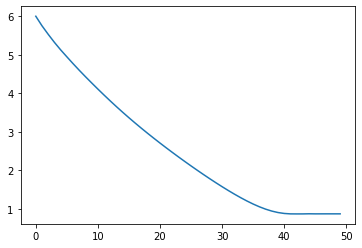

In [ ]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=11, out_features=11))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=11, out_features=11))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=11, out_features=1))
optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.2, momentum=0)
loss_f = nn.MSELoss()

loss_history_3 = []

for epoch in range(50):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1).float()))
    loss.backward()
    
    optim.step()

    loss_history_3.append(loss.item())

plt.plot(loss_history_3)
loss_train.append(loss_history_3[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)

loss_test_3 = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1)))
loss_test.append(loss_test_3.detach().numpy())
print(loss_test_3)

Четыре слоя

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([5197])) that is different to the input size (torch.Size([5197, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.8680, dtype=torch.float64, grad_fn=<SqrtBackward0>)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1300])) that is different to the input size (torch.Size([1300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


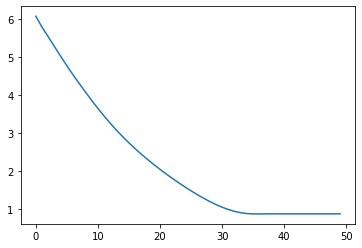

In [ ]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=11, out_features=11))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=11, out_features=11))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=11, out_features=11))
model.add_module('a3', nn.Tanh())
model.add_module('l4', nn.Linear(in_features=11, out_features=1))
optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.2, momentum=0)
loss_f = nn.MSELoss()

loss_history_4 = []

for epoch in range(50):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1).float()))
    loss.backward()
    
    optim.step()

    loss_history_4.append(loss.item())

plt.plot(loss_history_4)

loss_train.append(loss_history_4[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)

loss_test_4 = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1)))
loss_test.append(loss_test_4.detach().numpy())
print(loss_test_4)

Отрисовка

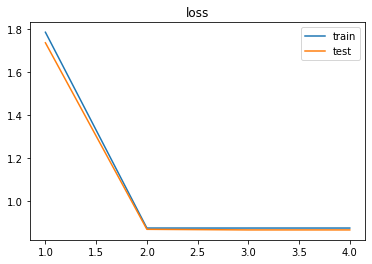

In [ ]:
plt.plot([1, 2, 3 , 4], loss_train)
plt.plot([1, 2, 3 , 4], loss_test)
plt.title('loss')
plt.legend(['train', 'test'])
plt.show()

## 1.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации: sigmoid, tanh, ReLU, ELU. 

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([5197])) that is different to the input size (torch.Size([5197, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1300])) that is different to the input size (torch.Size([1300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.9644, dtype=torch.float64, grad_fn=<SqrtBackward0>)
tensor(0.8661, dtype=torch.float64, grad_fn=<SqrtBackward0>)
tensor(2.2272, dtype=torch.float64, grad_fn=<SqrtBackward0>)
tensor(1.5470, dtype=torch.float64, grad_fn=<SqrtBackward0>)


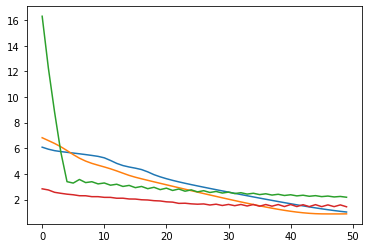

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_per], data[target], train_size=0.8)
loss_train_14 = []
loss_test_14 = []
Sigmoid = nn.Sigmoid()
Tanh = nn.Tanh()
ReLU = nn.ReLU()
ELU = nn.ELU()
activ = [Sigmoid, Tanh, ReLU, ELU]
for act in activ:
    model = nn.Sequential()
    model.add_module('l1', nn.Linear(in_features=11, out_features=11))
    model.add_module('a1', act)
    model.add_module('l2', nn.Linear(in_features=11, out_features=1))
    optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.2, momentum=0)
    loss_f = nn.MSELoss()
    loss_history = []
    for epoch in range(50):
        optim.zero_grad()
        model.train()

        y_pred_train = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
        loss = torch.sqrt(loss_f(y_pred_train, torch.from_numpy(y_train.to_numpy()).reshape(-1).float()))
        loss.backward()
        optim.step()

        loss_history.append(loss.item())

    plt.plot(loss_history)
    loss_train_14.append(loss_history[-1])
    
    y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
    y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
    loss_test = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1)))
    loss_test_14.append(loss_test.detach().numpy())
    print(loss_test)

Отрисовка

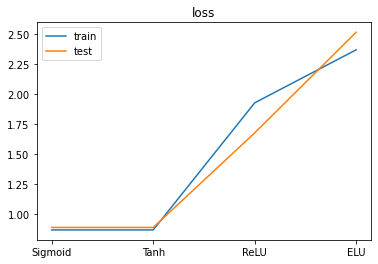

In [ ]:
plt.plot(['Sigmoid', 'Tanh', 'ReLU', 'ELU'], loss_train_14)
plt.plot(['Sigmoid', 'Tanh', 'ReLU', 'ELU'], loss_test_14)
plt.title('loss')
plt.legend(['train', 'test'])
plt.show()

## 1.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([5197])) that is different to the input size (torch.Size([5197, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1300])) that is different to the input size (torch.Size([1300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.7332, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.7328, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.7352, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.7317, dtype=torch.float64, grad_fn=<MseLossBackward0>)


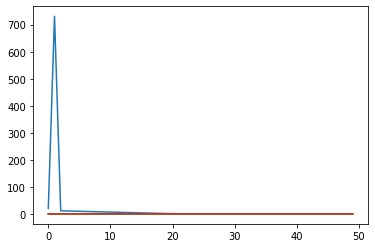

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_per], data[target], train_size=0.8)
loss_train_15 = []
loss_test_15 = []
model = nn.Sequential()
model.add_module('l1', nn.Linear(in_features=11, out_features=11))
model.add_module('a1', act)
model.add_module('l2', nn.Linear(in_features=11, out_features=1))
SGD = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0)
SGD_with_momentum = torch.optim.SGD(model.parameters(), lr=0.002, momentum=0.9)
RMSprop = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.5, momentum=0)
Adam = torch.optim.Adam(model.parameters(), lr=0.01)
loss_f = nn.MSELoss()
opt = [SGD, SGD_with_momentum, RMSprop, Adam]
for optim in opt:
    loss_history = []
    for epoch in range(50):
        optim.zero_grad()
        model.train()

        y_pred_train = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
        loss = torch.sqrt(loss_f(y_pred_train, torch.from_numpy(y_train.to_numpy()).reshape(-1).float()))
        loss.backward()
    
        optim.step()

        loss_history.append(loss.item())


    plt.plot(loss_history)
    loss_train_15.append(loss_history[-1])
    
    y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
    y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
    loss_test = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
    loss_test_15.append(loss_test.detach().numpy())
    print(loss_test)

In [ ]:
plt.plot(['SGD', 'SGD_with_momentum', 'RMSprop', 'Adam'], loss_train_15)
plt.plot(['SGD', 'SGD_with_momentum', 'RMSprop', 'Adam'], loss_test_15)
plt.title('loss')
plt.legend(['train', 'test'])
plt.show()

NameError: ignored

## 1.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

In [ ]:
loss_train_16 = []
loss_test_16 = []
X_train, X_test, y_train, y_test = train_test_split(data[columns_per], data[target], train_size=0.8)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([5197])) that is different to the input size (torch.Size([5197, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(2.5349, grad_fn=<SqrtBackward0>)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1300])) that is different to the input size (torch.Size([1300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


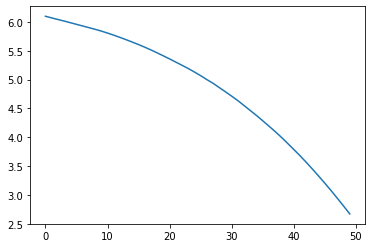

In [ ]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=11, out_features=11))
model.add_module('n1', nn.BatchNorm1d(11))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=11, out_features=1))
optim = torch.optim.Adam(model.parameters(), lr=0.01)
loss_f = nn.MSELoss()
loss_history_1 = []

for epoch in range(50):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1).float()))
    loss.backward()
    
    optim.step()

    loss_history_1.append(loss.item())

plt.plot(loss_history_1)

loss_train_16.append(loss_history_1[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)

loss_test_1 = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1).float()))
loss_test_16.append(loss_test_1.detach().numpy())
print(loss_test_1)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([5197])) that is different to the input size (torch.Size([5197, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(1.2075, grad_fn=<SqrtBackward0>)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1300])) that is different to the input size (torch.Size([1300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


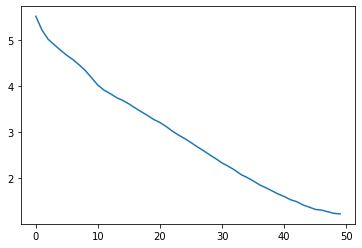

In [ ]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=11, out_features=11))
model.add_module('n1', nn.Dropout(0.2))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=11, out_features=1))
optim = torch.optim.Adam(model.parameters(), lr=0.01)
loss_f = nn.MSELoss()
loss_history_2 = []

for epoch in range(50):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1).float()))
    loss.backward()
    
    optim.step()

    loss_history_2.append(loss.item())

plt.plot(loss_history_2)

loss_train_16.append(loss_history_2[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)

loss_test_2 = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1).float()))
loss_test_16.append(loss_test_2.detach().numpy())
print(loss_test_2)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([5197])) that is different to the input size (torch.Size([5197, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(2.6465, grad_fn=<SqrtBackward0>)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1300])) that is different to the input size (torch.Size([1300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


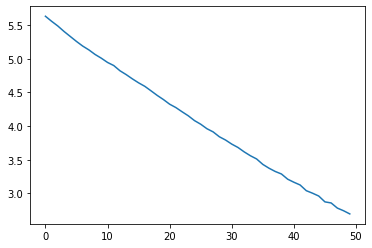

In [ ]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=11, out_features=11))
model.add_module('n1', nn.Dropout(0.5))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=11, out_features=1))
optim = torch.optim.Adam(model.parameters(), lr=0.01)
loss_f = nn.MSELoss()
loss_history_3 = []

for epoch in range(50):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1).float()))
    loss.backward()
    
    optim.step()

    loss_history_3.append(loss.item())

plt.plot(loss_history_3)

loss_train_16.append(loss_history_3[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)

loss_test_3 = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1).float()))
loss_test_16.append(loss_test_3.detach().numpy())
print(loss_test_3)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([5197])) that is different to the input size (torch.Size([5197, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(2.4941, grad_fn=<SqrtBackward0>)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1300])) that is different to the input size (torch.Size([1300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


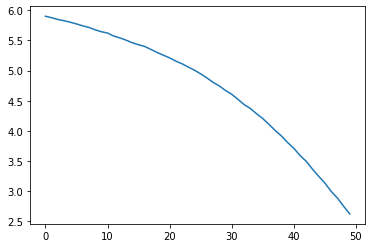

In [ ]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=11, out_features=11))
model.add_module('n1', nn.BatchNorm1d(11))
model.add_module('d1', nn.Dropout(0.2))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=11, out_features=1))
optim = torch.optim.Adam(model.parameters(), lr=0.01)
loss_f = nn.MSELoss()
loss_history_4 = []

for epoch in range(50):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1).float()))
    loss.backward()
    
    optim.step()

    loss_history_4.append(loss.item())

plt.plot(loss_history_4)

loss_train_16.append(loss_history_4[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)

loss_test_4 = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1).float()))
loss_test_16.append(loss_test_4.detach().numpy())
print(loss_test_4)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([5197])) that is different to the input size (torch.Size([5197, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(3.0879, grad_fn=<SqrtBackward0>)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1300])) that is different to the input size (torch.Size([1300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


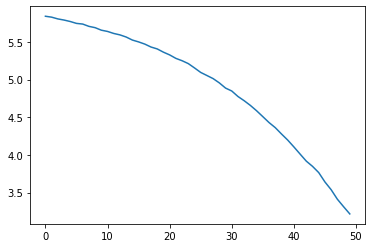

In [ ]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=11, out_features=11))
model.add_module('n1', nn.BatchNorm1d(11))
model.add_module('d1', nn.Dropout(0.5))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=11, out_features=1))
optim = torch.optim.Adam(model.parameters(), lr=0.01)
loss_f = nn.MSELoss()
loss_history_5 = []

for epoch in range(50):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1).float()))
    loss.backward()
    
    optim.step()

    loss_history_5.append(loss.item())

plt.plot(loss_history_5)

loss_train_16.append(loss_history_5[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)

loss_test_5 = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1).float()))
loss_test_16.append(loss_test_5.detach().numpy())
print(loss_test_5)

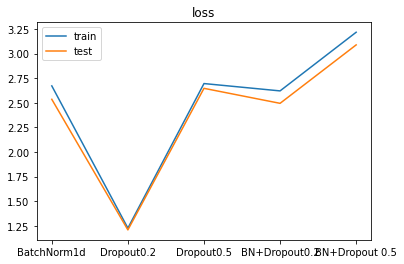

In [ ]:
plt.plot(['BatchNorm1d', 'Dropout0.2', 'Dropout0.5' , 'BN+Dropout0.2', 'BN+Dropout 0.5'], loss_train_16)
plt.plot(['BatchNorm1d', 'Dropout0.2', 'Dropout0.5' , 'BN+Dropout0.2', 'BN+Dropout 0.5'], loss_test_16)
plt.title('loss')
plt.legend(['train', 'test'])
plt.show()

## 1.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([5197])) that is different to the input size (torch.Size([5197, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.8525, grad_fn=<SqrtBackward0>)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1300])) that is different to the input size (torch.Size([1300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


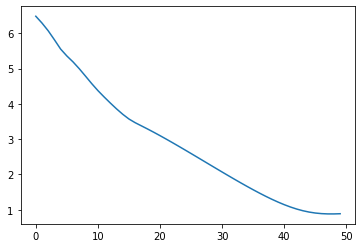

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_per], data[target], train_size=0.8)
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=11, out_features=11))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=11, out_features=1))
optim = torch.optim.Adam(model.parameters(), lr=0.01)
loss_f = nn.MSELoss()
loss_history = []

for epoch in range(50):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1).float()))
    loss.backward()
    
    optim.step()

    loss_history.append(loss.item())

plt.plot(loss_history)



y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)

loss_test = torch.sqrt(loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1).float()))
print(loss_test)

## 1.8 Выводы

По итогу можно сказать, что ситуация печальна, так как лучшая оценка была получена в ходе одного из многих испытаний и равна 0.73 (но если честно, то один раз было даже 0.69, но это просто удачная работа train_test_split и не более). В основном, качество оставляет желать лучшего. Да, можно увеличить количество эпох до тысяч, помереть от ожидания, получить 100%-ое переобучение, но получить должное качество. Однако повторюсь, это долго и энергозатратно. Основной вывод в том, что данную задачу логичнее всего решать обычной линейной регрессией или другими методами ML, но никак не нейронками.

# 2. Искусственная неронная сеть для решения задачи классификации (9 баллов)

## 2.1 Загрузите данные, поделить на train и test



In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks/WA_Fn-UseC_-HR-Employee-Attrition.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv("/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 2.2 По необходимости проведите преодбработку/нормализацию данных

In [ ]:
columns_num = ['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
columns_cat = ['BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime']
target = ['Attrition']

data = data.drop(['Over18'], axis = 1)
columns_cat.remove('Over18')

data = pd.get_dummies(data, columns=columns_cat)
columns_cat_new = []
for col_name in columns_cat:
    columns_cat_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
columns_cat = columns_cat_new

data['Attrition'] = data['Attrition'].replace(to_replace ="Yes", value = 1) 
data['Attrition'] = data['Attrition'].replace(to_replace ="No", value = 0) 

data = data.drop(['EmployeeCount'], axis = 1)
columns_num.remove('EmployeeCount')
data = data.drop(['StandardHours'], axis = 1)
columns_num.remove('StandardHours')
columns_num.remove('HourlyRate')
columns_num.remove('PerformanceRating')
columns_cat.remove('JobRole_Research Scientist')

data = data.drop(['HourlyRate'], axis = 1)
data = data.drop(['PerformanceRating'], axis = 1)
data = data.drop(['JobRole_Research Scientist'], axis = 1)

from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
pca.fit(data[columns_num + columns_cat])
data[columns_num + columns_cat] = pca.transform(data[columns_num + columns_cat])

## 2.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=логистическая регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
loss_train = []
loss_test = []
f1_train = []
f1_test = []

Один слой

0.5891525423728814


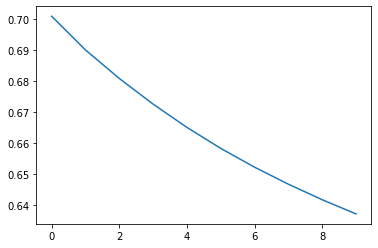

In [ ]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=2))
model.add_module('a1', nn.Sigmoid())
optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.2, momentum=0)
loss_f = F.cross_entropy

loss_history_1 = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history_1.append(loss.item())

plt.plot(loss_history_1)
f1_1_train = f1_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1), average='macro')
f1_train.append(f1_1_train)
loss_train.append(loss_history_1[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1_1 = f1_score(y_test, y_pred_metrics, average='macro')
f1_test.append(f1_1)
print(f1_1)
loss_test_1 = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
loss_test.append(loss_test_1.detach().numpy())

Два слоя

0.695900702270129


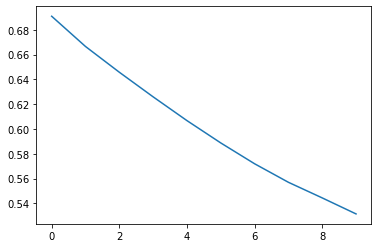

In [ ]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=2))
model.add_module('a2', nn.Sigmoid())

optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.2, momentum=0)
loss_f = F.cross_entropy
loss_history_2 = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history_2.append(loss.item())

plt.plot(loss_history_2)
f1_2_train = f1_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1), average='macro')
f1_train.append(f1_2_train)
loss_train.append(loss_history_2[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1_2 = f1_score(y_test, y_pred_metrics, average='macro')
f1_test.append(f1_2)
print(f1_2)
loss_test_2 = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
loss_test.append(loss_test_2.detach().numpy())

Три слоя

0.7325536062378167


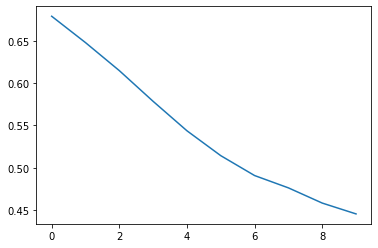

In [ ]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=49))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=49, out_features=2))
model.add_module('a3', nn.Sigmoid())

optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.2, momentum=0)
loss_f = F.cross_entropy
loss_history_3 = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history_3.append(loss.item())

plt.plot(loss_history_3)
f1_3_train = f1_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1), average='macro')
f1_train.append(f1_3_train)
loss_train.append(loss_history_3[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1_3 = f1_score(y_test, y_pred_metrics, average='macro')
f1_test.append(f1_3)
print(f1_3)
loss_test_3 = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
loss_test.append(loss_test_3.detach().numpy())

Четыре слоя

0.675456887035447


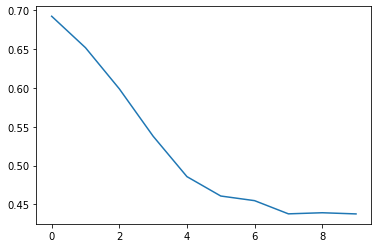

In [ ]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=49))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=49, out_features=49))
model.add_module('a3', nn.Tanh())
model.add_module('l4', nn.Linear(in_features=49, out_features=2))
model.add_module('a4', nn.Sigmoid())

optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.2, momentum=0)
loss_f = F.cross_entropy
loss_history_4 = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history_4.append(loss.item())

plt.plot(loss_history_4)
f1_4_train = f1_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1), average='macro')
f1_train.append(f1_4_train)
loss_train.append(loss_history_4[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1_4 = f1_score(y_test, y_pred_metrics, average='macro')
f1_test.append(f1_4)
print(f1_4)
loss_test_4 = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
loss_test.append(loss_test_4.detach().numpy())

Отрисовка

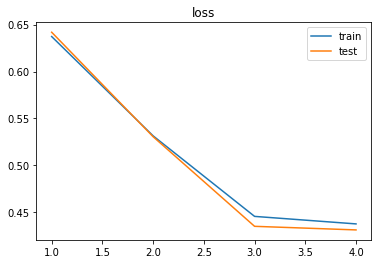

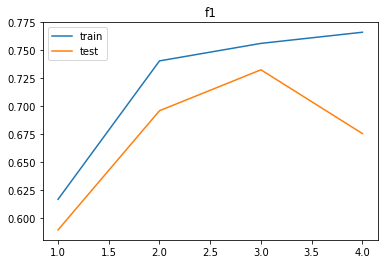

In [ ]:
plt.plot([1, 2, 3 , 4], loss_train)
plt.plot([1, 2, 3 , 4], loss_test)
plt.title('loss')
plt.legend(['train', 'test'])
plt.show()
plt.plot([1, 2, 3 , 4], f1_train)
plt.plot([1, 2, 3 , 4], f1_test)
plt.title('f1')
plt.legend(['train', 'test'])
plt.show()

## 2.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации на промежуточных слоях: sigmoid, tanh, ReLU, ELU. На выходном слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

0.4585635359116022
0.728001644736842
0.628927170390585
0.6433259713192521


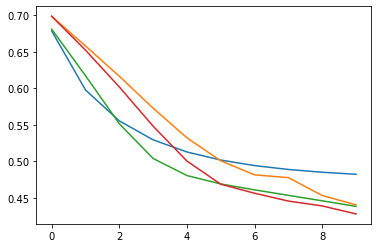

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
loss_train_24 = []
loss_test_24 = []
f1_train_24 = []
f1_test_24 = []
Sigmoid = nn.Sigmoid()
Tanh = nn.Tanh()
ReLU = nn.ReLU()
ELU = nn.ELU()

activ = [Sigmoid, Tanh, ReLU, ELU]
for act in activ:
    model = nn.Sequential()
    model.add_module('l1', nn.Linear(in_features=49, out_features=49))
    model.add_module('a1', act)
    model.add_module('l2', nn.Linear(in_features=49, out_features=49))
    model.add_module('a2', act)
    model.add_module('l3', nn.Linear(in_features=49, out_features=2))
    model.add_module('a3', nn.Sigmoid())
    optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.5, momentum=0)
    loss_f = F.cross_entropy
    loss_history = []
    for epoch in range(10):
        optim.zero_grad()
        model.train()

        y_pred_train = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
        loss = loss_f(y_pred_train, torch.from_numpy(y_train.to_numpy()).reshape(-1))
        loss.backward()
    
        optim.step()

        loss_history.append(loss.item())

    plt.plot(loss_history)
    f1_train = f1_score(y_train, np.argmax(y_pred_train.detach().numpy(), axis=1), average='macro')
    f1_train_24.append(f1_train)
    loss_train_24.append(loss_history[-1])
    
    y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
    y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
    f1 = f1_score(y_test, y_pred_metrics, average='macro')
    f1_test_24.append(f1)
    print(f1)
    loss_test = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
    loss_test_24.append(loss_test.detach().numpy())

Отрисовка

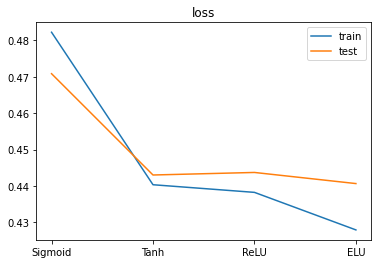

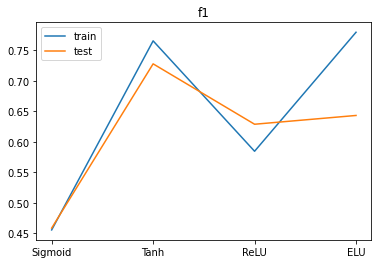

In [ ]:
plt.plot(['Sigmoid', 'Tanh', 'ReLU', 'ELU'], loss_train_24)
plt.plot(['Sigmoid', 'Tanh', 'ReLU', 'ELU'], loss_test_24)
plt.title('loss')
plt.legend(['train', 'test'])
plt.show()
plt.plot(['Sigmoid', 'Tanh', 'ReLU', 'ELU'], f1_train_24)
plt.plot(['Sigmoid', 'Tanh', 'ReLU', 'ELU'], f1_test_24)
plt.title('f1')
plt.legend(['train', 'test'])
plt.show()

## 2.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

0.4463276836158192
0.4463276836158192
0.6324511238196568
0.7594799566630551


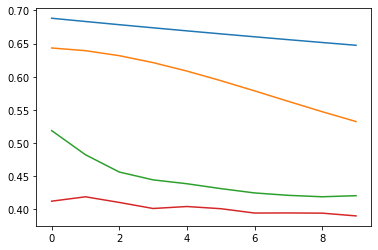

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
loss_train_25 = []
loss_test_25 = []
f1_train_25 = []
f1_test_25 = []
model = nn.Sequential()
model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=49))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=49, out_features=2))
model.add_module('a3', nn.Sigmoid())
SGD = torch.optim.SGD(model.parameters(), lr=0.2, momentum=0)
SGD_with_momentum = torch.optim.SGD(model.parameters(), lr=0.2, momentum=0.9)
RMSprop = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.5, momentum=0)
Adam = torch.optim.Adam(model.parameters(), lr=0.01)
loss_f = F.cross_entropy
opt = [SGD, SGD_with_momentum, RMSprop, Adam]
for optim in opt:
    loss_history = []
    for epoch in range(10):
        optim.zero_grad()
        model.train()

        y_pred_train = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
        loss = loss_f(y_pred_train, torch.from_numpy(y_train.to_numpy()).reshape(-1))
        loss.backward()
    
        optim.step()

        loss_history.append(loss.item())

    plt.plot(loss_history)
    f1_train = f1_score(y_train, np.argmax(y_pred_train.detach().numpy(), axis=1), average='macro')
    f1_train_25.append(f1_train)
    loss_train_25.append(loss_history[-1])
    
    y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
    y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
    f1 = f1_score(y_test, y_pred_metrics, average='macro')
    f1_test_25.append(f1)
    print(f1)
    loss_test = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
    loss_test_25.append(loss_test.detach().numpy())

Отрисовка

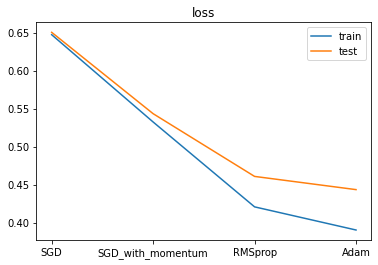

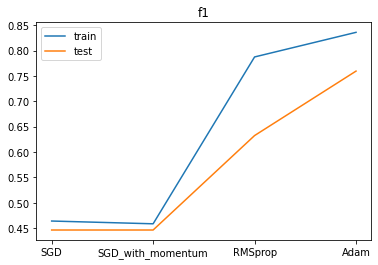

In [ ]:
plt.plot(['SGD', 'SGD_with_momentum', 'RMSprop', 'Adam'], loss_train_25)
plt.plot(['SGD', 'SGD_with_momentum', 'RMSprop', 'Adam'], loss_test_25)
plt.title('loss')
plt.legend(['train', 'test'])
plt.show()
plt.plot(['SGD', 'SGD_with_momentum', 'RMSprop', 'Adam'], f1_train_25)
plt.plot(['SGD', 'SGD_with_momentum', 'RMSprop', 'Adam'], f1_test_25)
plt.title('f1')
plt.legend(['train', 'test'])
plt.show()

## 2.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

In [ ]:
loss_train_26 = []
loss_test_26 = []
f1_train_26 = []
f1_test_26 = []

0.7450581343904296


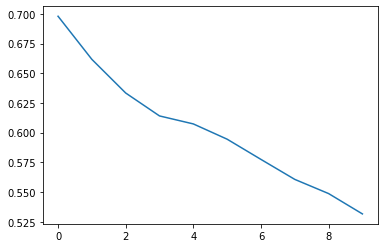

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('n1', nn.BatchNorm1d(49))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=49))
model.add_module('n2', nn.BatchNorm1d(49))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=49, out_features=2))
model.add_module('a3', nn.Sigmoid())

optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.5, momentum=0)
loss_f = F.cross_entropy
loss_history_1 = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history_1.append(loss.item())

plt.plot(loss_history_1)
f1_1_train = f1_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1), average='macro')
f1_train_26.append(f1_1_train)
loss_train_26.append(loss_history_1[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1_1 = f1_score(y_test, y_pred_metrics, average='macro')
f1_test_26.append(f1_1)
print(f1_1)
loss_test_1 = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
loss_test_26.append(loss_test_1.detach().numpy())

0.714605088983674


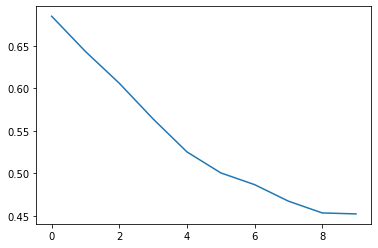

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('n1', nn.Dropout(0.2))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=49))
model.add_module('n2', nn.Dropout(0.2))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=49, out_features=2))
model.add_module('a3', nn.Sigmoid())

optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.5, momentum=0)
loss_f = F.cross_entropy
loss_history_2 = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history_2.append(loss.item())

plt.plot(loss_history_2)
f1_2_train = f1_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1), average='macro')
f1_train_26.append(f1_2_train)
loss_train_26.append(loss_history_2[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1_2 = f1_score(y_test, y_pred_metrics, average='macro')
f1_test_26.append(f1_2)
print(f1_2)
loss_test_2 = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
loss_test_26.append(loss_test_2.detach().numpy())

0.712890625


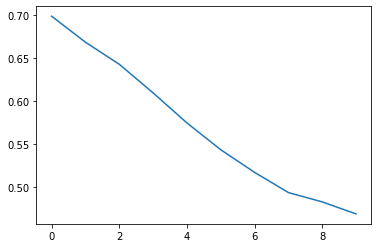

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('n1', nn.Dropout(0.5))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=49))
model.add_module('n2', nn.Dropout(0.5))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=49, out_features=2))
model.add_module('a3', nn.Sigmoid())

optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.5, momentum=0)
loss_f = F.cross_entropy
loss_history_3 = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history_3.append(loss.item())

plt.plot(loss_history_3)
f1_3_train = f1_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1), average='macro')
f1_train_26.append(f1_3_train)
loss_train_26.append(loss_history_3[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1_3 = f1_score(y_test, y_pred_metrics, average='macro')
f1_test_26.append(f1_3)
print(f1_3)
loss_test_3 = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
loss_test_26.append(loss_test_3.detach().numpy())

0.6444743029895869


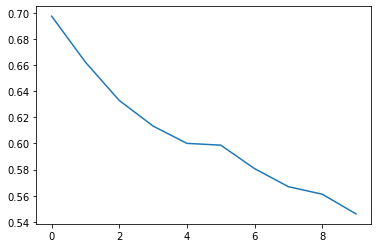

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('n1', nn.BatchNorm1d(49))
model.add_module('d1', nn.Dropout(0.2))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=49))
model.add_module('n2', nn.BatchNorm1d(49))
model.add_module('d2', nn.Dropout(0.2))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=49, out_features=2))
model.add_module('a3', nn.Sigmoid())

optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.5, momentum=0)
loss_f = F.cross_entropy
loss_history_4 = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history_4.append(loss.item())

plt.plot(loss_history_4)
f1_4_train = f1_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1), average='macro')
f1_train_26.append(f1_4_train)
loss_train_26.append(loss_history_4[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1_4 = f1_score(y_test, y_pred_metrics, average='macro')
f1_test_26.append(f1_4)
print(f1_4)
loss_test_4 = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
loss_test_26.append(loss_test_4.detach().numpy())

0.6393691588785047


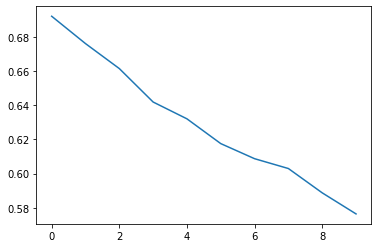

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('n1', nn.BatchNorm1d(49))
model.add_module('d1', nn.Dropout(0.5))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=49))
model.add_module('n2', nn.BatchNorm1d(49))
model.add_module('d2', nn.Dropout(0.5))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=49, out_features=2))
model.add_module('a3', nn.Sigmoid())

optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.5, momentum=0)
loss_f = F.cross_entropy
loss_history_5 = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history_5.append(loss.item())

plt.plot(loss_history_5)
f1_5_train = f1_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1), average='macro')
f1_train_26.append(f1_5_train)
loss_train_26.append(loss_history_5[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1_5 = f1_score(y_test, y_pred_metrics, average='macro')
f1_test_26.append(f1_5)
print(f1_5)
loss_test_5 = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
loss_test_26.append(loss_test_5.detach().numpy())

Отрисовка

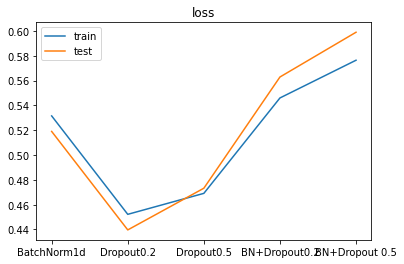

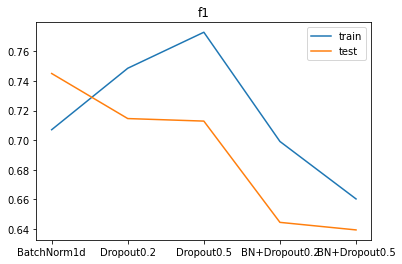

In [ ]:
plt.plot(['BatchNorm1d', 'Dropout0.2', 'Dropout0.5' , 'BN+Dropout0.2', 'BN+Dropout 0.5'], loss_train_26)
plt.plot(['BatchNorm1d', 'Dropout0.2', 'Dropout0.5' , 'BN+Dropout0.2', 'BN+Dropout 0.5'], loss_test_26)
plt.title('loss')
plt.legend(['train', 'test'])
plt.show()
plt.plot(['BatchNorm1d', 'Dropout0.2', 'Dropout0.5' , 'BN+Dropout0.2', 'BN+Dropout0.5'], f1_train_26)
plt.plot(['BatchNorm1d', 'Dropout0.2', 'Dropout0.5' , 'BN+Dropout0.2', 'BN+Dropout0.5'], f1_test_26)
plt.title('f1')
plt.legend(['train', 'test'])
plt.show()

## 2.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

0.7680575035063113


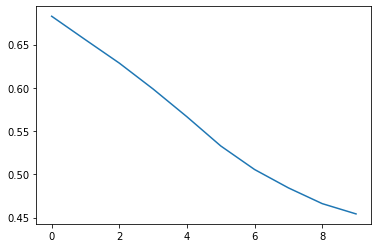

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('d1', nn.Dropout(0.2))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=49))
model.add_module('d2', nn.Dropout(0.2))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=49, out_features=2))
model.add_module('a3', nn.Sigmoid())
optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.2, momentum=0)
loss_f = F.cross_entropy
loss_history = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history.append(loss.item())

plt.plot(loss_history)

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1 = f1_score(y_test, y_pred_metrics, average='macro')
print(f1)

## 2.8 Выводы

*Your beautiful thoughts:*

В данной задаче ситуация несколько лучше, чем в первой. Была получена нужная оценка точность, причем железная, а не переодически появляющаяся. 
В среднем модель показывает 0.74 (максимум 0.79). Однако здесь очень часто во время вножественных спытаниях вылезала проблема переобучения. Например при 4 слоях. Что явно указывает нам, что данная задача не хочет решения с помощью нейронной сети. А требует что-то более простое, например обычную логрегрессию.